**Remember categories are chosen so to make sense for business decision making to produce efficiency gains.**

In this analysis, we will only look at the patterns of those who have churned to see if we see similar type of churners. If you have more granular data (groups) you can fit on one variable.

In [1]:
import pandas as  pd

df = pd.read_csv("data/telco_churn.csv")

df.shape

(7043, 21)

tenure, MonthlyCharges and TotalCharges are not cateogical variables, hence they show large cardinality. The rest of the variables are indeed categorical, in this problem set, one hot encoding would work fine because of the low cardinality present. In applied machine learning you do not want to exploit leakages, you want to fix them.

In [2]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

pd.options.display.max_rows = None

df["TotalChargesConv"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

del df["TotalCharges"]

df["TotalChargesConv"].isnull().sum()

11

TotalCharges is completely missing. From further analysis, I am convinced that they are missed at random and that the fact that they are missing does not contain any value. So I would go ahead and just fill the values with the mean

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalChargesConv
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65


Here I would now also seek to see if there are more missing feature present.

In [4]:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(df)

,Total,Percent
TotalChargesConv,11,0.156183
OnlineSecurity,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000


In [5]:
concatter = df.copy()

In [6]:
import numpy as np

cols_drop = ["customerID","Churn"]
id_target = df[cols_drop]

df = pd.get_dummies(df.drop(cols_drop, axis=1))
df = pd.concat((id_target, df),axis=1)

df["TotalChargesConv"] = df["TotalChargesConv"].fillna(df["TotalChargesConv"].mean())


In [7]:
df.head()

,customerID,Churn,tenure,MonthlyCharges,TotalChargesConv,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,No,1,29.85,29.85,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,No,34,56.95,1889.50,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Yes,2,53.85,108.15,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,No,45,42.30,1840.75,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Yes,2,70.70,151.65,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [8]:
## Immediately Remove High Correlates
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.999999)]

In [9]:
to_drop

['gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'PaperlessBilling_Yes']

In [10]:
df = df.drop(to_drop, axis=1)

In [11]:
## KNN is a linear model so standardisation

In [12]:
df = df[df["Churn"]=="Yes"].reset_index(drop=True)

In [13]:
df.shape

(1869, 35)

In [14]:


def Standardisation(df, leave_out=[]):
    from sklearn.preprocessing import StandardScaler
    leave = df[leave_out]
    df = df.drop(leave_out,axis=1)
    listed = list(df)
    scaler = StandardScaler()
    try:
        scaled = scaler.fit_transform(df)
    except:
        print("error_triggered")
        scaled = scaler.fit_transform(df.fillna(df.mean()))
    df = pd.DataFrame(scaled)
    df.columns = listed
    df = pd.concat((df,leave ),axis=1)
    return df

In [15]:
df = Standardisation(df, cols_drop)

In [16]:
df.head()

,tenure,MonthlyCharges,TotalChargesConv,gender_Female,SeniorCitizen_0,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,Churn
0,-0.818356,-0.835028,-0.753126,-1.004827,0.584558,0.746659,0.459648,-0.316321,1.096090,-0.913319,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,-1.158493,2.251262,3668-QPYBK,Yes
1,-0.818356,-0.151720,-0.730114,0.995196,0.584558,0.746659,0.459648,-0.316321,1.096090,-0.913319,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,9237-HQITU,Yes
2,-0.511072,1.022272,-0.376284,0.995196,0.584558,0.746659,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,9305-CDSKC,Yes
3,0.513209,1.231117,0.801058,0.995196,0.584558,-1.339299,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,7892-POOKP,Yes
4,1.588704,1.186509,1.853924,-1.004827,0.584558,0.746659,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,2.498837,-0.376461,-1.158493,-0.444195,0280-XJGEX,Yes


In [17]:
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sn
from sklearn.cluster import KMeans


cluster_range = range(1, 8)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(df.drop(["customerID","Churn"],axis=1))
    cluster_errors.append( clusters.inertia_ )

In [18]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,61677.000000,1
1,53859.490634,2
2,48667.465517,3
3,44423.573345,4
4,41282.147026,5
5,39442.468691,6
6,38117.202361,7


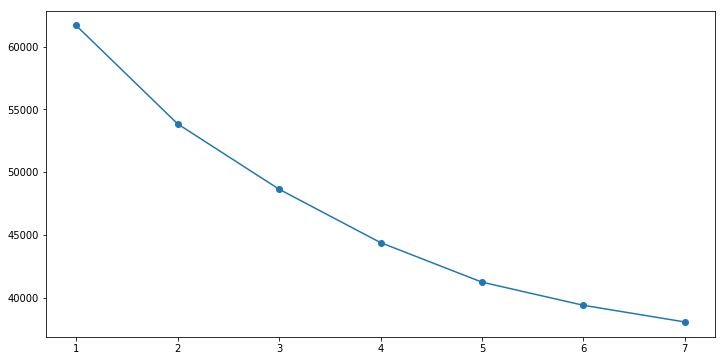

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## After 5 nothing much happens

In [20]:
df.head()

,tenure,MonthlyCharges,TotalChargesConv,gender_Female,SeniorCitizen_0,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,Churn
0,-0.818356,-0.835028,-0.753126,-1.004827,0.584558,0.746659,0.459648,-0.316321,1.096090,-0.913319,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,-1.158493,2.251262,3668-QPYBK,Yes
1,-0.818356,-0.151720,-0.730114,0.995196,0.584558,0.746659,0.459648,-0.316321,1.096090,-0.913319,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,9237-HQITU,Yes
2,-0.511072,1.022272,-0.376284,0.995196,0.584558,0.746659,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,9305-CDSKC,Yes
3,0.513209,1.231117,0.801058,0.995196,0.584558,-1.339299,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,-0.400186,-0.376461,0.863191,-0.444195,7892-POOKP,Yes
4,1.588704,1.186509,1.853924,-1.004827,0.584558,0.746659,0.459648,-0.316321,-0.912334,1.094908,...,0.35959,-0.31221,-0.162355,-0.578792,2.498837,-0.376461,-1.158493,-0.444195,0280-XJGEX,Yes


For n_clusters = 2 The average silhouette_score is : 0.1352161275269855


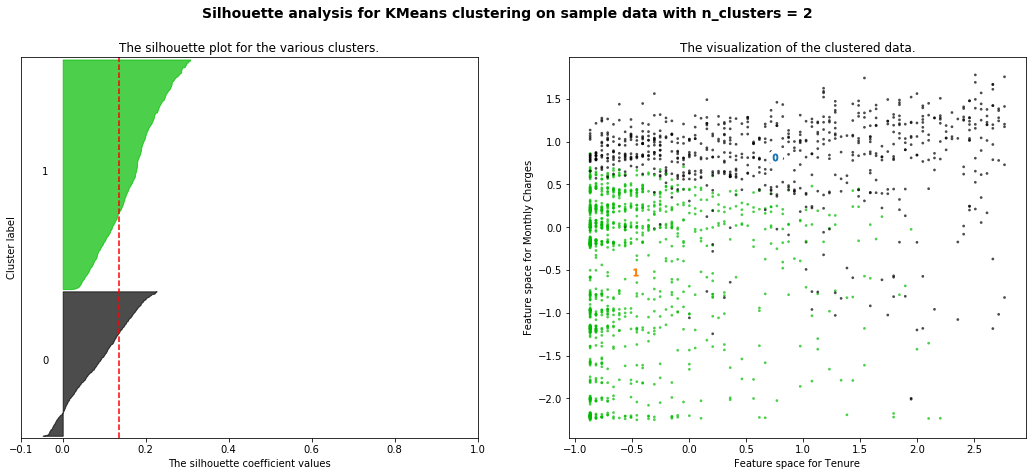

For n_clusters = 3 The average silhouette_score is : 0.14673807358908605


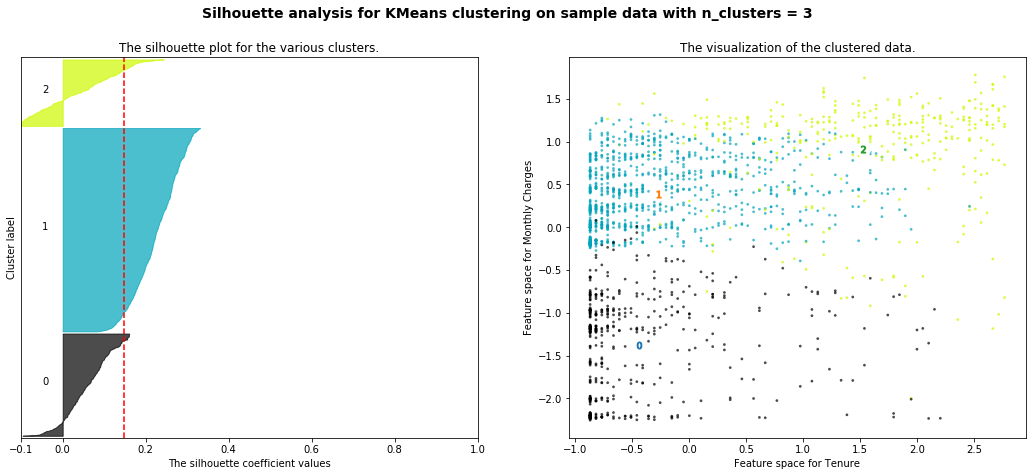

For n_clusters = 4 The average silhouette_score is : 0.1664522029400136


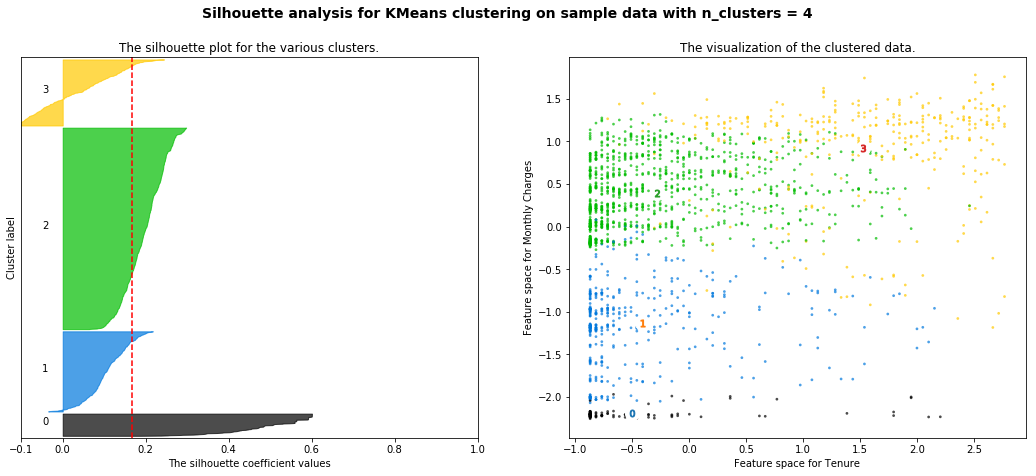

For n_clusters = 5 The average silhouette_score is : 0.13487650719504365


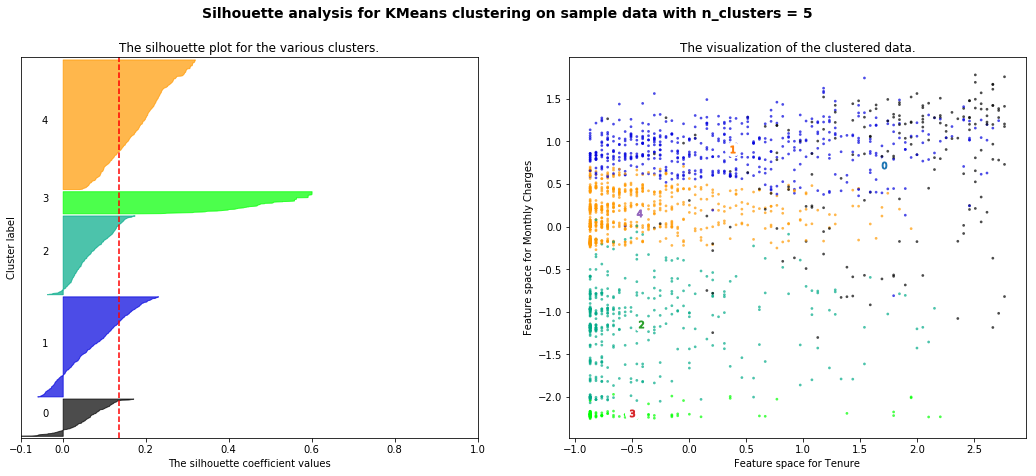

For n_clusters = 6 The average silhouette_score is : 0.13762668987481483


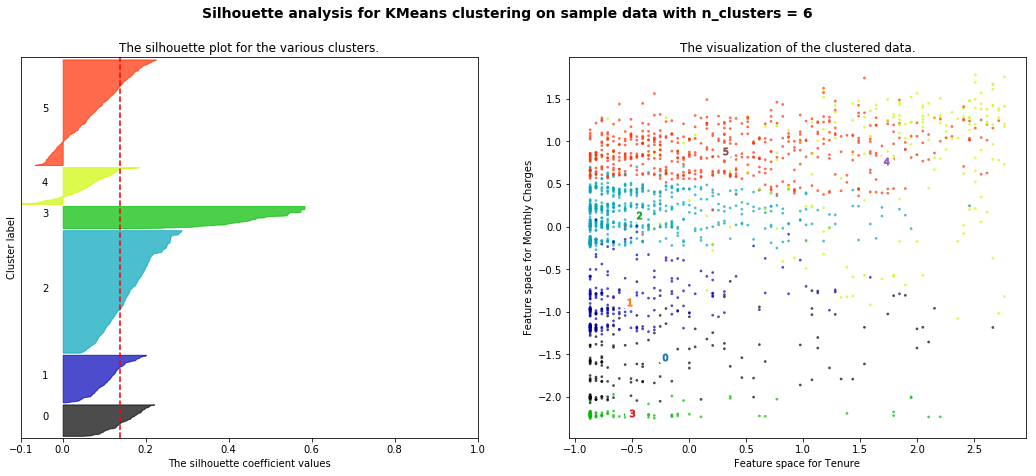

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

cluster_range = range( 2, 7 )

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df.drop(["customerID","Churn"],axis=1)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( df.drop(["customerID","Churn"],axis=1) )

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.drop(["customerID","Churn"],axis=1), cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.drop(["customerID","Churn"],axis=1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ## Tenure and Monthly Charges
    ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for Tenure")
    ax2.set_ylabel("Feature space for Monthly Charges")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

In [22]:
clusters = KMeans(3)
clusters.fit(df.drop(["customerID","Churn"],axis=1).T)
#cluster_errors.append( clusters.inertia_ )
centroids = clusters.cluster_centers_

clusters = KMeans(3)
clusters.fit(df.drop(["customerID","Churn"],axis=1))
labels = clusters.predict(df.drop(["customerID","Churn"],axis=1))
# Centroid values

In [23]:
for i, c in enumerate(centroids):
    df["Cluster "+str(i)] = list(c)

In [24]:
df2 = pd.merge(df.iloc[:,-5:],concatter.drop(["Churn"],axis=1),on="customerID",how="left")

In [38]:
for i, c in enumerate(centroids):
    del df["Cluster "+str(i)]

In [25]:
df2.head()

,customerID,Churn,Cluster 0,Cluster 1,Cluster 2,gender,SeniorCitizen,Partner,Dependents,tenure,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalChargesConv
0,3668-QPYBK,Yes,0.397689,0.006605,-0.593579,Male,0,No,No,2,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,9237-HQITU,Yes,-0.082435,0.602334,-0.528716,Female,0,No,No,2,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,9305-CDSKC,Yes,-0.249803,0.048350,0.478896,Female,0,No,No,8,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,7892-POOKP,Yes,-0.025764,-0.358534,0.719943,Female,0,Yes,No,28,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,0280-XJGEX,Yes,-0.174887,-0.327309,1.151077,Male,0,No,No,49,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [26]:
pd.options.display.max_columns = None

In [27]:
# Long Contract Mobile Flipper
df2.sort_values("Cluster 0").head(10)

,customerID,Churn,Cluster 0,Cluster 1,Cluster 2,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalChargesConv
159,1626-ERCMM,Yes,-0.607743,0.049058,0.356737,Male,1,Yes,No,20,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,1899.65
684,6861-XWTWQ,Yes,-0.607743,-0.141283,0.463950,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.25,665.45
783,9685-WKZGT,Yes,-0.607743,0.602334,-0.202379,Male,1,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
396,5240-IJOQT,Yes,-0.607743,0.602334,-0.320865,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,74.70
184,6683-VLCTZ,Yes,-0.607743,0.048350,0.589973,Male,1,No,No,20,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.55,1842.80
1827,1400-MMYXY,Yes,-0.607743,-0.333152,0.675691,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65
1369,1075-BGWOH,Yes,-0.607743,-0.141283,0.556795,Male,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.75,1587.55
419,3068-OMWZA,Yes,-0.607743,0.230169,0.158766,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,88.80,88.80
472,9606-PBKBQ,Yes,-0.607743,0.230882,0.217056,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,2642.05
231,0781-LKXBR,Yes,-0.607743,0.048350,0.492654,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.60


In [28]:
## These are customers who got charged once with 1 tenure
df2.sort_values("Cluster 1").head(10)

,customerID,Churn,Cluster 0,Cluster 1,Cluster 2,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalChargesConv
212,1038-ZAGBI,Yes,0.701006,-1.479332,-0.545263,Female,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,229.60
1182,8580-QVLOC,Yes,1.176886,-1.479332,1.080528,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.45,6440.25
1596,1555-DJEQW,Yes,0.971197,-1.479332,1.443384,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.20,7723.90
394,2667-WYLWJ,Yes,0.491831,-1.479332,-0.570426,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.75,145.00
165,4464-JCOLN,Yes,0.517373,-1.479332,-0.606521,Male,0,Yes,Yes,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.90
1573,7951-QKZPL,Yes,0.851271,-1.479332,-0.542332,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30
994,8631-NBHFZ,Yes,1.010218,-1.297513,0.727294,Male,1,Yes,Yes,66,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.40,5154.60
1468,5271-YNWVR,Yes,0.562943,-1.295543,1.435871,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00
1261,0607-DAAHE,Yes,1.061145,-1.289700,-0.643482,Male,0,No,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1052.35
463,0516-VRYBW,Yes,0.701006,-1.289700,-0.504584,Female,0,No,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.15,390.85


In [29]:
## These are male senior citizens, long tenure internet service short term conracts

## Thrifty Silver Surfer 
df2.sort_values("Cluster 2").head(10)

,customerID,Churn,Cluster 0,Cluster 1,Cluster 2,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalChargesConv
1710,9318-NKNFC,Yes,0.325163,-0.764631,-0.968118,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85
1140,6121-VZNQB,Yes,0.491831,-0.764631,-0.967091,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,19.10
1494,5510-BOIUJ,Yes,0.517373,-1.004197,-0.966474,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,19.25
558,0761-AETCS,Yes,0.459421,-0.580841,-0.966269,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.30,19.30
1471,4667-OHGKG,Yes,0.325163,-0.764631,-0.966269,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30
657,5766-ZJYBB,Yes,0.517373,-0.764631,-0.965858,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.40
814,9174-FKWZE,Yes,0.075939,-0.580841,-0.965653,Female,1,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.45,19.45
345,1725-MIMXW,Yes,0.325163,-1.004197,-0.965653,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.45,19.45
1211,4760-XOHVN,Yes,0.684042,-1.193829,-0.965653,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,19.45
455,7551-JOHTI,Yes,0.684042,-0.764631,-0.965447,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.50,19.50


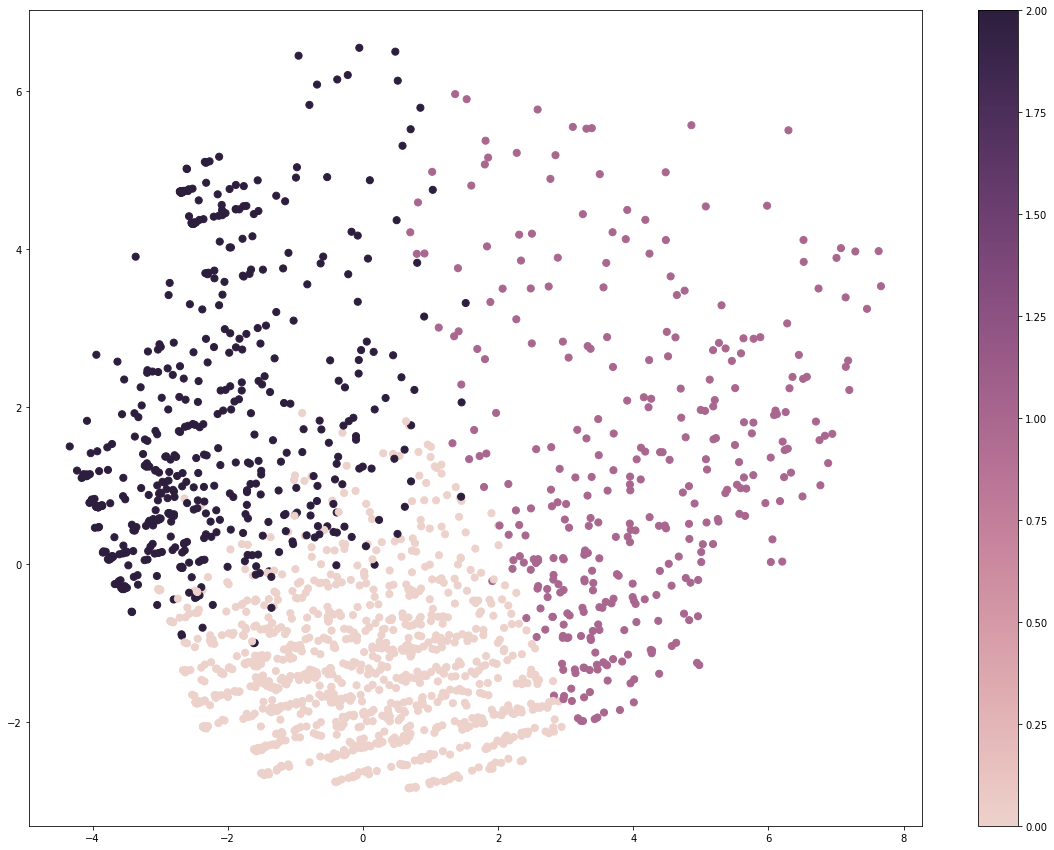

In [39]:
from sklearn.pipeline import make_pipeline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#pca2 = PCA(n_components=2)

pca2_results = make_pipeline(StandardScaler(),PCA(n_components=2)).fit_transform(df.drop(["customerID","Churn"],axis=1))

for i in range(pca2_results.shape[1]):
    df.drop(["customerID","Churn"],axis=1)["pca_"+str(i)] = pca2_results[:,i]

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0], pca2_results[:,1],c=labels,  s=50, cmap=cmap)
#c=df_2.TARGET,
f.colorbar(points)
plt.show()
### Each dot is a customer
## There is probably some room for another cluster top right



In [51]:
df = df.drop(["Churn"],axis=1).set_index("customerID")

In [54]:
df.T.head()

customerID        3668-QPYBK  9237-HQITU  9305-CDSKC  7892-POOKP  0280-XJGEX  \
tenure             -0.818356   -0.818356   -0.511072    0.513209    1.588704   
MonthlyCharges     -0.835028   -0.151720    1.022272    1.231117    1.186509   
TotalChargesConv   -0.753126   -0.730114   -0.376284    0.801058    1.853924   
gender_Female      -1.004827    0.995196    0.995196    0.995196   -1.004827   
SeniorCitizen_0     0.584558    0.584558    0.584558    0.584558    0.584558   

customerID        4190-MFLUW  8779-QRDMV  1066-JKSGK  6467-CHFZW  8665-UTDHZ  \
tenure             -0.408644   -0.869570   -0.869570    1.486276   -0.869570   
MonthlyCharges     -0.780282   -1.410872   -2.201644    1.010106   -1.794092   
TotalChargesConv   -0.530835   -0.789363   -0.799679    1.702018   -0.794362   
gender_Female       0.995196   -1.004827   -1.004827   -1.004827   -1.004827   
SeniorCitizen_0     0.584558   -1.710693    0.584558    0.584558    0.584558   

customerID        8773-HHUOZ  6047-YHPVI  5380-WJKOV  8168-UQWWF  7760-OYPDY  \
tenure             -0.050145   -0.664714    0.820493   -0.357430   -0.818356   
MonthlyCharges     -0.395034   -0.192272    1.293973    0.949278    0.251776   
TotalChargesConv   -0.232075   -0.642694    1.067257   -0.225569   -0.734081   
gender_Female       0.995196   -1.004827   -1.004827    0.995196    0.995196   
SeniorCitizen_0     0.584558    0.584558    0.584558    0.584558    0.584558   

customerID        9420-LOJKX  7495-OOKFY  1658-BYGOY  5698-BQJOH  5919-TMRGD  \
tenure             -0.152573   -0.511072    0.001069   -0.459858   -0.869570   
MonthlyCharges      0.999968    0.251776    0.851952    0.809372    0.199058   
TotalChargesConv   -0.055756   -0.475315    0.116781   -0.356843   -0.768361   
gender_Female       0.995196    0.995196   -1.004827    0.995196    0.995196   
SeniorCitizen_0     0.584558   -1.710693   -1.710693    0.584558    0.584558   

customerID        9191-MYQKX  8637-XJIVR  0278-YXOOG  4598-XLKNJ  3192-NQECA  \
tenure             -0.562286   -0.306216   -0.664714    0.359567    2.561770   
MonthlyCharges      0.028738    0.182837   -2.165147    0.975637    1.441989   
TotalChargesConv   -0.547472   -0.319759   -0.750110    0.519862    3.216420   
gender_Female       0.995196    0.995196   -1.004827    0.995196   -1.004827   
SeniorCitizen_0     0.584558    0.584558    0.584558   -1.710693    0.584558   

customerID        0486-HECZI  4846-WHAFZ  5299-RULOA  0404-SWRVG  4412-YLTKF  \
tenure              1.895988    0.974135   -0.408644   -0.767142    0.461995   
MonthlyCharges      0.904670    0.083484    1.046603   -0.001676    0.146340   
TotalChargesConv    1.961102    0.706947   -0.247126   -0.688904    0.319366   
gender_Female      -1.004827    0.995196    0.995196   -1.004827    0.995196   
SeniorCitizen_0     0.584558   -1.710693    0.584558    0.584558   -1.710693   

customerID        6207-WIOLX  3091-FYHKI  2372-HWUHI  0390-DCFDQ  4080-OGPJL  \
tenure              0.359567   -0.869570   -0.818356   -0.869570   -0.511072   
MonthlyCharges     -0.642404   -1.581192   -1.220276   -0.161858   -0.133471   
TotalChargesConv   -0.015419   -0.791585   -0.767356   -0.773069   -0.512161   
gender_Female       0.995196   -1.004827   -1.004827    0.995196    0.995196   
SeniorCitizen_0     0.584558    0.584558    0.584558   -1.710693    0.584558   

customerID        2135-RXIHG  3874-EQOEP  0867-MKZVY  3376-BMGFE  3445-HXXGF  \
tenure             -0.869570   -0.562286    0.103497   -0.715928    2.049630   
MonthlyCharges     -1.167558    0.833703    0.322743   -0.143610   -1.181751   
TotalChargesConv   -0.786189   -0.463571    0.032034   -0.665918    0.592178   
gender_Female      -1.004827   -1.004827    0.995196    0.995196   -1.004827   
SeniorCitizen_0     0.584558    0.584558    0.584558    0.584558   -1.710693   

customerID        1875-QIVME  0691-JVSYA  2656-FMOKZ  2070-FNEXE  6317-YPKDH  \
tenure             -0.818356    1.793560   -0.152573   -0.562286   -0.86

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

## Just taking small sample 
df = df.sample(50)

cosine_similarity(df.T).shape

cos_mat = pd.DataFrame(cosine_similarity(df), index=list(df.T.columns), columns=list(df.T.columns))

## Make diagonal zero
cos_mat.values[[np.arange(len(cos_mat))]*2] = 0

def front(self, n):
    return self.iloc[:, :n]

pd.DataFrame.front = front

cos_mat.head(5).front(5)

,9158-VCTQB,0822-GAVAP,1589-AGTLK,2761-OCIAX,7881-INRLC
9158-VCTQB,0.000000,-0.396541,-0.685509,-0.382261,0.268059
0822-GAVAP,-0.396541,0.000000,0.466408,-0.063165,-0.254059
1589-AGTLK,-0.685509,0.466408,0.000000,0.360815,-0.412549
2761-OCIAX,-0.382261,-0.063165,0.360815,0.000000,-0.049787
7881-INRLC,0.268059,-0.254059,-0.412549,-0.049787,0.000000


In [65]:
import igraph

from scipy.cluster.hierarchy import dendrogram, linkage

## I think the diagonal creates the one drpop
Z = linkage(cos_mat, 'ward')

cos_mat.drop_duplicates().shape

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(cos_mat))

#list(cos_mat.as_matrix())


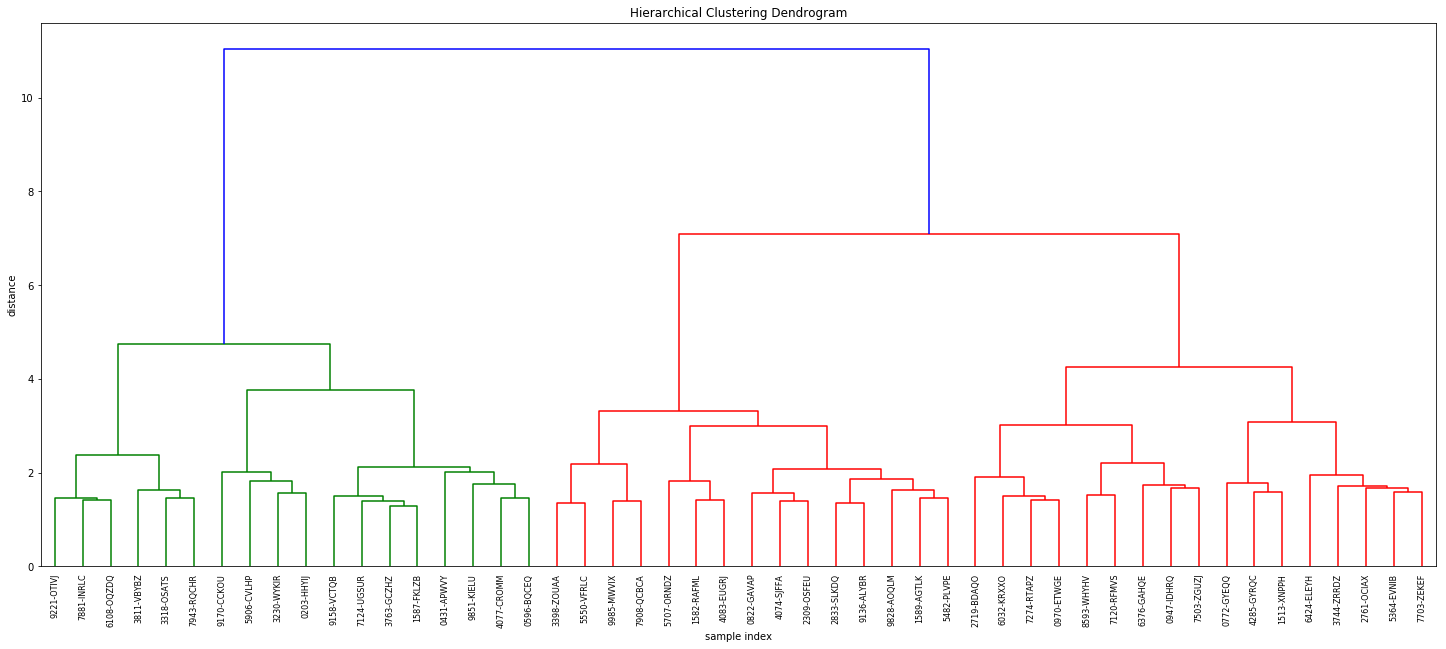

In [66]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = list(cos_mat.columns),
)
plt.show()

## You can create a reasonable argument for 4 clusters. 